# P🅰️RTs

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import Imputer

In [38]:
data = pd.read_csv('part_count.csv', index_col=0)

In [39]:
data

,mon,thur,fri
1,18.0,23.0,23.0
2,5.0,13.0,38.0
3,16.0,18.0,19.0
4,17.0,13.0,40.0
5,26.0,29.0,NaN
6,NaN,8.0,47.0
7,14.0,27.0,51.0
8,32.0,NaN,49.0
9,NaN,NaN,NaN
10,10.0,17.0,NaN


## Exploratory Data Analysis

First things first... almost 1100 P🅰️RTs!

In [40]:
data.sum().sum()

1083.0

Let's get a quick visualization of the P🅰️RTs over time...

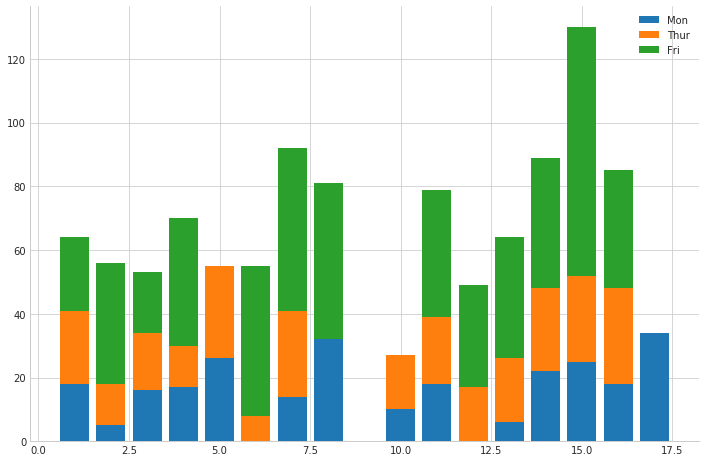

In [43]:
data_ = data.fillna(0)

fig, ax = plt.subplots(figsize=[12, 8])
mon  = plt.bar(data_.index, data_['mon'],
               label='Mon')
thur = plt.bar(data_.index, data_['thur'],
               bottom=data_['mon'], label='Thur')
fri  = plt.bar(data_.index, data_['fri'],
               bottom=data_['mon'] + data_['thur'], label='Fri')
plt.legend()
sns.despine()
plt.show()

And now let's see how the number of P🅰️RTs changes depending on the day...

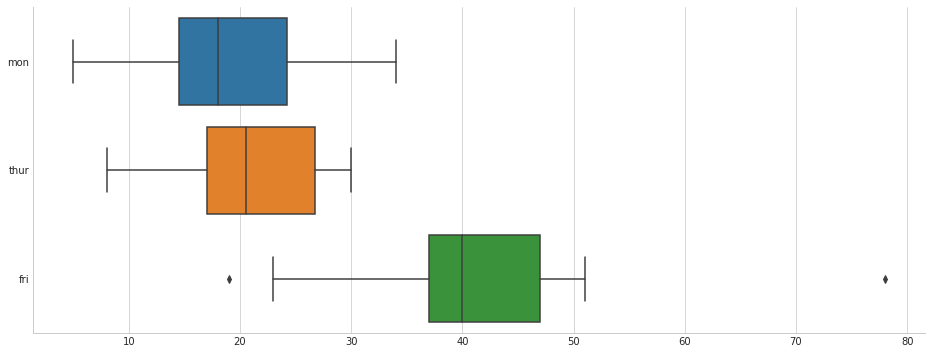

In [44]:
fig, ax = plt.subplots(figsize=[16, 6])
sns.boxplot(data=data, orient='h');
sns.despine()

In [4]:
dff = df.copy()
dff['friday2'] = dff['friday']
#(~dff.isna()).sum(axis='columns')

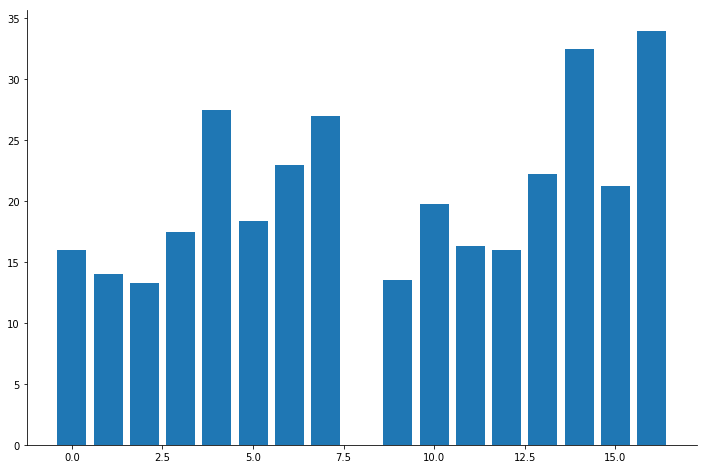

In [11]:
fig, ax = plt.subplots(figsize=[12, 8])
ax.bar(range(17), df.sum(axis='columns') / (~dff.isna()).sum(axis='columns'))
sns.despine()

## Data Preprocessing

In [5]:
df = data.copy()

# Week 9 was spring break; drop it entirely
df.drop(9, axis='rows', inplace=True)

# NaNs are due to snow days, midterms, etc.
# Impute them with column-wise median.
imp = Imputer(strategy='median')
df = pd.DataFrame(imp.fit_transform(df),
                  index=df.index,
                  columns=df.columns)

In [6]:
df = df.stack().reset_index()
df.columns = ['week', 'day', 'count']

In [8]:
df.head()

,week,day,count
0,1,mon,18.0
1,1,thur,23.0
2,1,fri,23.0
3,2,mon,5.0
4,2,thur,13.0


In [ ]:
# Fit Poisson to 